# ABE 416X Project:
## Monthly Temperature Prediction Tool for Tourists Travel in U.S.
There are large amount of tourists traveling in the U.S. from all over the world. But for the people that's first time visiting the city or even first time come to America, they would have no idea about the weather, especially temperature, of the destination at the time they plan to travel. Moreover, some tourists might want to travel sometime and somewhere warm or cool, then it will be essential to know the average temperature of certain city and month to make travel plan. This tool is predicting the maximum, minimum, and average temperatures of the user's interest city and month. It will also display a histogram of 12 monthes average temperature in a year for the interested city to help the visitor to make travel plan. 

### Part 1: Data Scrambling & Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn as sk
import sklearn.datasets as skd
import sklearn.ensemble as ske
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Import data file
df = pd.read_csv('ames_99-18.csv')
df.head()

,Date,ppt (mm),tmin (degrees C),tmean (degrees C),tmax (degrees C)
0,1999-01,27.43,-13.2,-9.0,-4.7
1,1999-02,16.42,-4.2,0.3,4.9
2,1999-03,26.09,-3.6,2.4,8.4
3,1999-04,142.35,4.4,9.7,14.9
4,1999-05,140.68,10.6,16.0,21.3


In [3]:
# Shape of the data
print('The shape of our features is:', df.shape)

The shape of our features is: (240, 5)


Seperate date to year and month.

In [4]:
# Split year and month
date = df["Date"].str.split("-", n = 1, expand = True)
df["Year"]= date[0]
df["Month"]= date[1]

In [6]:
df.head()

,Date,ppt (mm),tmin (degrees C),tmean (degrees C),tmax (degrees C),Year,Month
0,1999-01,27.43,-13.2,-9.0,-4.7,1999,01
1,1999-02,16.42,-4.2,0.3,4.9,1999,02
2,1999-03,26.09,-3.6,2.4,8.4,1999,03
3,1999-04,142.35,4.4,9.7,14.9,1999,04
4,1999-05,140.68,10.6,16.0,21.3,1999,05


In [7]:
# Check if there are any N/As
pd.isnull(df).any()

Date                 False
ppt (mm)             False
tmin (degrees C)     False
tmean (degrees C)    False
tmax (degrees C)     False
Year                 False
Month                False
dtype: bool

In [8]:
# Another way to check for N/As
pd.isnull(df).sum()

Date                 0
ppt (mm)             0
tmin (degrees C)     0
tmean (degrees C)    0
tmax (degrees C)     0
Year                 0
Month                0
dtype: int64

In [9]:
# Show data description
df.describe()

,ppt (mm),tmin (degrees C),tmean (degrees C),tmax (degrees C)
count,240.000000,240.000000,240.000000,240.000000
mean,76.322458,3.400833,9.116667,14.831667
std,59.160344,10.475610,10.833053,11.239504
min,1.180000,-17.800000,-12.800000,-7.800000
25%,32.232500,-5.300000,-0.425000,4.425000
50%,60.060000,3.850000,10.350000,16.900000
75%,105.452500,13.750000,19.625000,25.725000
max,307.320000,20.100000,25.900000,32.500000


In [10]:
# Calculate correlation
corr = df.corr(method = 'pearson')
corr

,ppt (mm),tmin (degrees C),tmean (degrees C),tmax (degrees C)
ppt (mm),1.000000,0.572513,0.550638,0.527079
tmin (degrees C),0.572513,1.000000,0.997297,0.989858
tmean (degrees C),0.550638,0.997297,1.000000,0.997611
tmax (degrees C),0.527079,0.989858,0.997611,1.000000


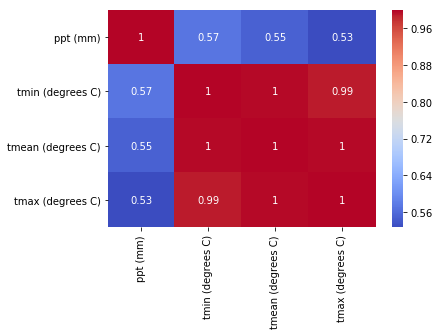

In [11]:
# Plot correlation
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.savefig('heatmap.png', tight_layout = True)

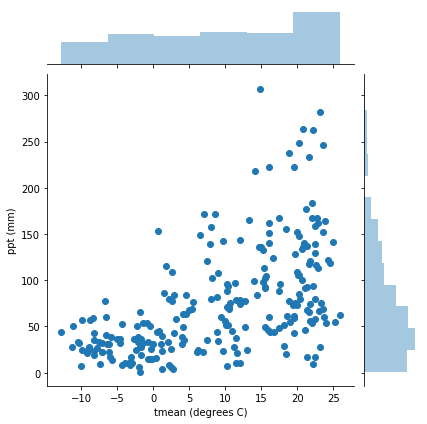

In [12]:
# Plot of distribution
sns.jointplot(df['tmean (degrees C)'], df['ppt (mm)'], kind = 'scatter')

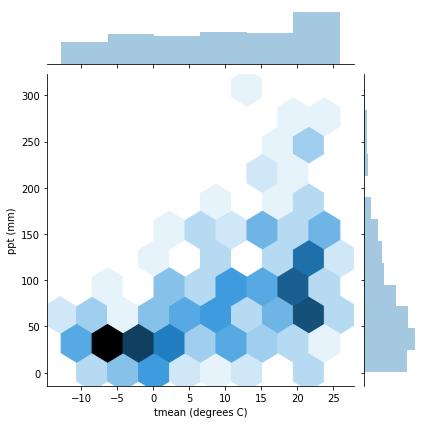

In [13]:
# Another plot of distribution
sns.jointplot(df['tmean (degrees C)'], df['ppt (mm)'], kind = 'hex')

### Part 2: Random Forest Model
### Model for average temperature and precipitation prediction from 1999 to 2008. 

In [14]:
from sklearn.model_selection import train_test_split

# Select columns of x and y
dft = df[0:120].T

x = dft[5:7].T
y1 = dft[3:4].T
y2 = dft[1:2].T

print (x.shape)
print (y1.shape)
print (y2.shape)

(120, 2)
(120, 1)
(120, 1)


In [15]:
x.head()

,Year,Month
0,1999,01
1,1999,02
2,1999,03
3,1999,04
4,1999,05


In [16]:
y1.head()

,tmean (degrees C)
0,-9
1,0.3
2,2.4
3,9.7
4,16


In [17]:
y2.head()

,ppt (mm)
0,27.43
1,16.42
2,26.09
3,142.35
4,140.68


In [18]:
# Split training and testing dataset for temperature
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y1, test_size = 0.3, random_state=1)
print(x1_train.shape)
print(y1_train.shape)
print(x1_test.shape)
print(y1_test.shape)

(84, 2)
(84, 1)
(36, 2)
(36, 1)


In [19]:
# Split training and testing dataset for precipitation
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2, test_size = 0.3, random_state=1)
print(x2_train.shape)
print(y2_train.shape)
print(x2_test.shape)
print(y2_test.shape)

(84, 2)
(84, 1)
(36, 2)
(36, 1)


In [20]:
# flat the array
y1_train = np.ravel(y1_train)
y2_train = np.ravel(y2_train)

In [21]:
# fit the model for temperature
reg1 = ske.RandomForestRegressor(n_estimators= 1000, random_state= 0)
reg1.fit(x1_train, y1_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [22]:
# fit the model for precipitation
reg2 = ske.RandomForestRegressor(n_estimators= 1000, random_state= 0)
reg2.fit(x2_train, y2_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

### Model for average temperature and precipitation prediction from 2009 to 2018. 

In [23]:
# Repeat model fit for 2009-2018 data points
dft = df[120:240].T

xr = dft[5:7].T
y1r = dft[3:4].T
y2r = dft[1:2].T

x1r_train, x1r_test, y1r_train, y1r_test = train_test_split(xr, y1r, test_size = 0.3, random_state=1)
y1r_train = np.ravel(y1r_train)
reg1r = ske.RandomForestRegressor(n_estimators= 1000, random_state= 0)
reg1r.fit(x1r_train, y1r_train)

x2r_train, x2r_test, y2r_train, y2r_test = train_test_split(xr, y2r, test_size = 0.3, random_state=1)
y2r_train = np.ravel(y2r_train)
reg2r = ske.RandomForestRegressor(n_estimators= 1000, random_state= 0)
reg2r.fit(x2r_train, y2r_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

### Part 3: Evaluation 
### Temperature prediction from 1999 to 2008

In [24]:
# Predict temperature
y1_pred = reg1.predict(x1_test)
y1_pred

array([-5.6821, 23.6783, -3.1169, 11.7702, 20.2594,  6.1799, 22.1097,
       10.4269, -5.5049,  1.4649, -4.2062, 10.9557,  3.473 , 18.9571,
       21.3562, 18.2596,  3.8365, 21.5663, 22.5161,  1.1261, 17.3964,
       20.8685, -3.9823, -5.4159, -6.0627, -2.4969, -9.015 , 16.8018,
       21.843 , 23.233 , 11.4317, 23.5792,  5.4817, 23.5299,  2.738 ,
       21.5343])

In [25]:
# Evaluate the model
print('Explained variance: ', explained_variance_score(y1_test, y1_pred))
print('Mean absolute error: ', mean_absolute_error(y1_test, y1_pred))
print('Mean squared error: ', mean_squared_error(y1_test, y1_pred))
print('R-square: ', r2_score(y1_test, y1_pred, multioutput = 'variance_weighted'))

Explained variance:  0.9162277997113648
Mean absolute error:  2.6364805555555364
Mean squared error:  10.179172936388841
R-square:  0.9148537952259631


In [26]:
# Calculate difference of mean and predicted temperature
tmean1 = df['tmean (degrees C)'].mean()
diff1 = y1_pred - tmean1
diff1

array([-14.79876667,  14.56163333, -12.23356667,   2.65353333,
        11.14273333,  -2.93676667,  12.99303333,   1.31023333,
       -14.62156667,  -7.65176667, -13.32286667,   1.83903333,
        -5.64366667,   9.84043333,  12.23953333,   9.14293333,
        -5.28016667,  12.44963333,  13.39943333,  -7.99056667,
         8.27973333,  11.75183333, -13.09896667, -14.53256667,
       -15.17936667, -11.61356667, -18.13166667,   7.68513333,
        12.72633333,  14.11633333,   2.31503333,  14.46253333,
        -3.63496667,  14.41323333,  -6.37866667,  12.41763333])

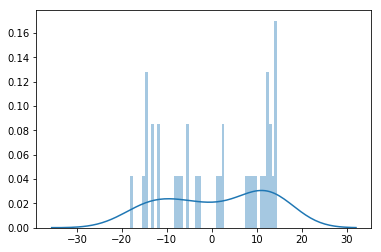

In [35]:
# Plot the difference 
sns.distplot(diff1, bins = 50)

### Precipitation prediction from 1999 to 2008

Explained variance:  0.333641146324394
Mean absolute error:  39.01355111111107
Mean squared error:  3049.2610208866345
R-square:  0.229183378687147


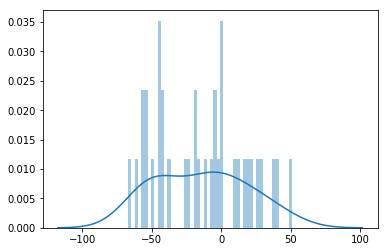

In [28]:
# Repeat the evaluation for precipitation 1999-2008 data
y2_pred = reg2.predict(x2_test)
print('Explained variance: ', explained_variance_score(y2_test, y2_pred))
print('Mean absolute error: ', mean_absolute_error(y2_test, y2_pred))
print('Mean squared error: ', mean_squared_error(y2_test, y2_pred))
print('R-square: ', r2_score(y2_test, y2_pred, multioutput = 'variance_weighted'))
tmean2 = df['ppt (mm)'].mean()
diff2 = y2_pred - tmean2
type(diff2)
sns.distplot(diff2, bins = 50)

### Compute how much each feature contributes to decreasing the weighted impurity within a tree. 

In [29]:
# Calculate importances of each feature
reg1.feature_importances_

array([0.03570776, 0.96429224])

In [30]:
fet_ind = np.argsort(reg1.feature_importances_)
fet_imp = reg1.feature_importances_[np.argsort(reg1.feature_importances_)][::-1]

Text(0.5, 1.0, 'Features importance')

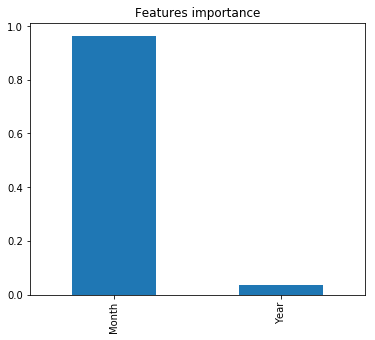

In [31]:
# Plot the importance of each feature
fig, ax = plt.subplots(1, 1, figsize = (6, 5))
labels = (['Month', 'Year'])
pd.Series(fet_imp, index= labels).plot('bar', ax=ax)
ax.set_title('Features importance')

### Temperature prediction from 2009 to 2018. 

Explained variance:  0.9558186339116481
Mean absolute error:  1.8349861111111112
Mean squared error:  5.608552584166683
R-square:  0.9557178315021038


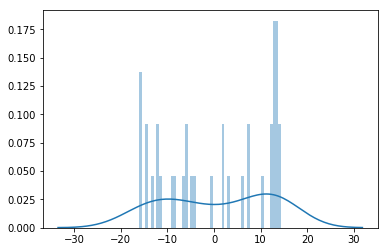

In [32]:
# Repeat the evaluation for temperature 2009-2018 data
y1r_pred = reg1r.predict(x1r_test)

print('Explained variance: ', explained_variance_score(y1r_test, y1r_pred))
print('Mean absolute error: ', mean_absolute_error(y1r_test, y1r_pred))
print('Mean squared error: ', mean_squared_error(y1r_test, y1r_pred))
print('R-square: ', r2_score(y1r_test, y1r_pred, multioutput = 'variance_weighted'))

tmean1r = df['tmean (degrees C)'].mean()
diff1r = y1r_pred - tmean1r
sns.distplot(diff1r, bins = 50)

### Precipitation prediction from 2009 to 2018. 

Explained variance:  0.21801527362798745
Mean absolute error:  43.09796027777792
Mean squared error:  3812.2892846932396
R-square:  0.21801240550381148


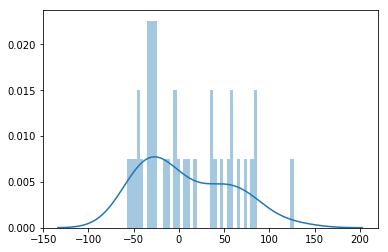

In [33]:
# Repeat the evaluation for precipitation 2009-2018 data
y2r_pred = reg2r.predict(x2r_test)

print('Explained variance: ', explained_variance_score(y2r_test, y2r_pred))
print('Mean absolute error: ', mean_absolute_error(y2r_test, y2r_pred))
print('Mean squared error: ', mean_squared_error(y2r_test, y2r_pred))
print('R-square: ', r2_score(y2r_test, y2r_pred, multioutput = 'variance_weighted'))

tmean2r = df['ppt (mm)'].mean()
diff2r = y2r_pred - tmean2r
sns.distplot(diff2r, bins = 50)

### Part 4: Tool for User

In [34]:
# yet to complete

### Conclusion
The prediction accuracy of temperature in late 90's is calculated to be about 91.48%, and in the recent decade is about 95.57%. The plot of difference between predicted and average temperature data shows large difference, which indicate the model is necessary and useful for temperature prediction. The prediction accuracy of precipitation in late 90's is about 22.9%, and in the recent decade is about 21.8%. The plot of difference between predicted and average precipitation data shows little difference, which indicate the model is unnecessary and not useful for precipitation prediction. Besides, there is no clear trend and difference between the two decades. Part 5 shows that month has much higher weight in the trees than year, which is reasonable that temperature changes more in different month than year. Thus, base on the accuracy of each model, we can conclude that average temperature have much higher accuracy which is required and reliable. On the other hand, the accuracy of precipitation prediction is too low to show enough evidence for solid prediction. 